In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [3]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
Y = reg(X) + np.random.normal(0, 5, 100)

In [6]:
# Create DataFrame
Sim_1 = pd.DataFrame({'X': X, 'Y': Y})

In [7]:
Sim_1.head()

,X,Y
0,6.915195,21.763548
1,11.221088,1.201202
2,9.377277,24.539737
3,12.853586,29.530616
4,12.799758,23.325363


In [8]:
# Split into training and testing sets
Train_set = Sim_1.iloc[:80]
Test_set = Sim_1.iloc[80:]

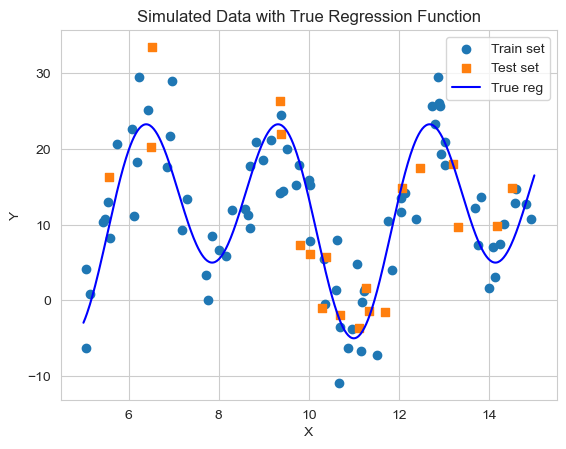

In [9]:
# Plot the training and testing points
plt.scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
plt.scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

In [10]:
# Set bin count
k = 5

In [15]:
class StepFunction:
    def __init__(self, x, y):
        """
        Initialize with breakpoints `x` and values `y`.
        `x` should have length k+1 and `y` should have length k.
        """
        if len(y) != (len(x) - 1):
            raise ValueError("Length of y must be one less than length of x")
        self.x = x
        self.y = y

    def predict(self, z):
        # Predict step function values at input z (scalar or array).
        
        z = np.asarray(z) # convert the input datatype to np array
        result = np.zeros_like(z, dtype=float) # makes an np array of zeros of same length as of the input vector.
        
        for i in range(len(self.y)): # iterating over all the bins
            # check: Does the value of z belongs to the i-th bin? If yes, then insert the yes, then y value of that bin in inserted in result
            result[(z >= self.x[i]) & (z < self.x[i + 1])] = self.y[i]
        return result

In [12]:
# For understanding
u = np.array([100,200,400])
u[[0,2]]

array([100, 400])

In [13]:
# For understanding
u[[False, True, False]]

array([200])

In [14]:
# For understanding
u[[False, False, False]]

array([], dtype=int32)

In [ ]:
def Bin_smoothing(k, Train_set, Test_set, reg_func):
    x_train = Train_set['X'].values; y_train = Train_set['Y'].values
    # Bin edges
    BI = np.linspace(5, 15, k + 1)
    Means = []

    for j in range(k):
        # store the data/observations indices for which the x-value lies in the j-th bin
        indices = np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]
        # compute the mean of the corresponding y-values
        m = np.mean(y_train[indices]) if len(indices) > 0 else 0
        
        Means.append(m)

    sf = StepFunction(BI, Means)
    
    ## Plotting
    # Scatter plots
    plt.plot(Train_set['X'], Train_set['Y'], 'o', label='Train')
    plt.plot(Test_set['X'], Test_set['Y'], 's', label='Test')
    
    # Plot the true regression function (assuming reg_func is a Python function)
    x_curve = np.linspace(Train_set['X'].min(), Train_set['X'].max(), 500)
    plt.plot(x_curve, reg_func(x_curve), color='blue', label='True function')
    
    # Plot the step function
    plt.plot(x_curve, sf.predict(x_curve), color='red', label='Step function')
    for b in BI:
        plt.axvline(x=b, color='gray', linestyle='dotted')
    
    plt.legend()
    plt.title(f'k = {k}')
    plt.show()

    # Compute test and train errors
    err_Test = np.mean((Test_set['Y'].values - sf.predict(Test_set['X'].values))**2)
    err_Train = np.mean((Train_set['Y'].values - sf.predict(Train_set['X'].values))**2)
    
    print('Train error =',err_Train, '\nTest error =', err_Test)

In [17]:
# For understanding
x_train = Train_set['X'].values; y_train = Train_set['Y'].values
BI = np.linspace(5, 15, k + 1)
j=1

np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]

array([ 5,  6, 10, 14, 20, 23, 26, 28, 36, 48, 60, 64, 74, 79],
      dtype=int64)

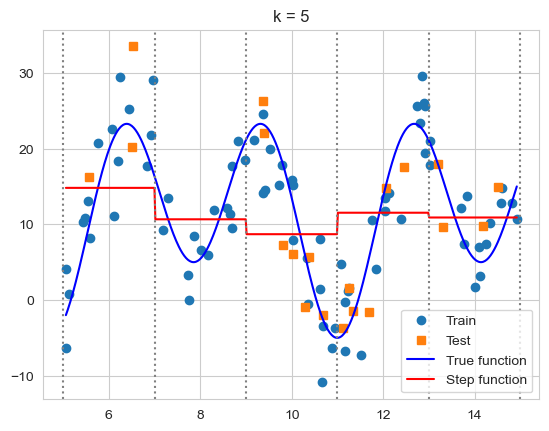

Train error = 81.32519884680246 
Test error = 93.98518039175073


In [19]:
Bin_smoothing(k=5, Train_set=Train_set, Test_set=Test_set, reg_func=reg)

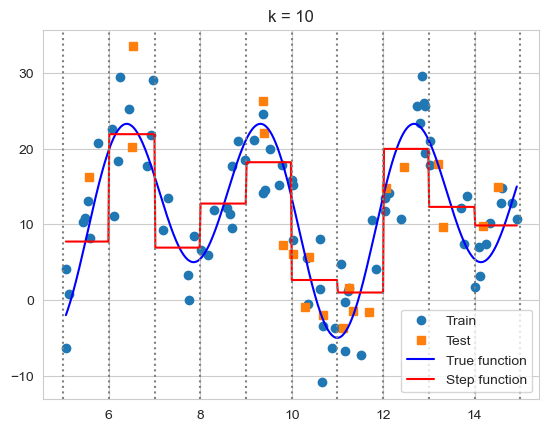

Train error = 36.70100949901854 
Test error = 29.906918012052785


In [20]:
Bin_smoothing(k=10, Train_set=Train_set, Test_set=Test_set, reg_func=reg)

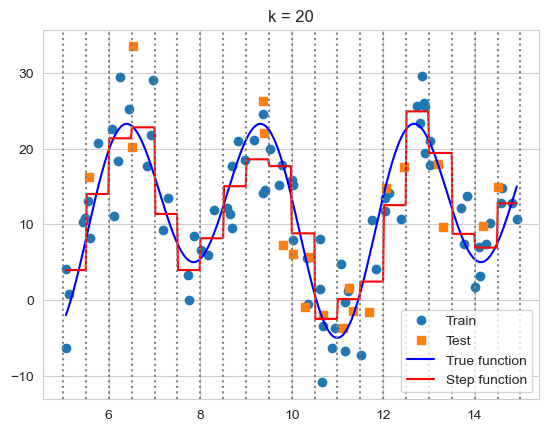

Train error = 20.422338171669306 
Test error = 29.509100451489324


In [21]:
Bin_smoothing(k=20, Train_set=Train_set, Test_set=Test_set, reg_func=reg)